In [1]:
# Install seaborn if not already installed
!pip install seaborn

In [2]:
# Install folium if not already installed
!pip install folium

In [3]:
# Install termcolor if not already installed
!pip install termcolor

In [4]:
# Import Libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import termcolor


In [6]:
# Read in Air Quality data by county
aqi_county_2015_2020_df = pd.read_csv('/content/county_annual_aqi.csv')
display(aqi_county_2015_2020_df.shape)
display(aqi_county_2015_2020_df.head())

(6151, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,205,58,1,0,0,0,129,57,39,0,0,169,95,0
1,Alabama,Clay,2015,112,73,39,0,0,0,0,92,56,43,0,0,0,112,0
2,Alabama,Colbert,2015,280,221,59,0,0,0,0,76,56,39,0,0,179,101,0
3,Alabama,DeKalb,2015,363,294,68,1,0,0,0,101,55,38,0,0,284,79,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0


In [7]:
# Read in Air Quality data by State (Washington, New York, New Mexico)
aqi_WA_NY_NM_2015_2020_df = pd.read_csv('/content/aqi_WA_NY_NM_2015_2020.csv')
display(aqi_WA_NY_NM_2015_2020_df.shape)
display(aqi_WA_NY_NM_2015_2020_df.head())

(139, 56)

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.80,0.50,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
1,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.79,0.41,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
2,53,33,30,45201,6,47.597222,-122.319722,WGS84,Benzene,7,...,1.62,1.12,Seattle-10th & Weller,10th & Weller,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
3,53,33,34,45201,6,47.600833,-122.314444,NAD83,Benzene,7,...,1.36,0.92,Seattle-Yesler Way,1301 Yesler Way,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
4,53,33,35,45201,6,47.599444,-122.326111,NAD83,Benzene,7,...,1.51,0.99,Seattle-6th & Jackson,602 S Jackson St,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21


In [44]:
aqi_WA_NY_NM_2015_2020_df.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'metric_used', 'method',
       'year', 'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile'

In [8]:
# Read in Air Quality data by State (Washington, New York, Texas)
aqi_WA_NY_TX_2015_2020_df = pd.read_csv('/content/aqi_WA_NY_TX_2015_2020.csv')
display(aqi_WA_NY_TX_2015_2020_df.shape)
display(aqi_WA_NY_TX_2015_2020_df.head())

(237, 56)

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.80,0.50,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
1,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.79,0.41,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
2,53,33,30,45201,6,47.597222,-122.319722,WGS84,Benzene,7,...,1.62,1.12,Seattle-10th & Weller,10th & Weller,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
3,53,33,34,45201,6,47.600833,-122.314444,NAD83,Benzene,7,...,1.36,0.92,Seattle-Yesler Way,1301 Yesler Way,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
4,53,33,35,45201,6,47.599444,-122.326111,NAD83,Benzene,7,...,1.51,0.99,Seattle-6th & Jackson,602 S Jackson St,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21


In [71]:
# Read in Global Health data concerning respitory illness
ihme_gbd_2015_2020_df = pd.read_csv('/content/IHME-GBD_2021_DATA-a408dab9-1.csv')
display(ihme_gbd_2015_2020_df.shape)
display(ihme_gbd_2015_2020_df.head(20))

(396, 16)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,27,Probability of death,554,New Mexico,1,Male,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2010,0.090795,NaN,NaN
1,27,Probability of death,554,New Mexico,2,Female,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2010,0.087510,NaN,NaN
2,27,Probability of death,554,New Mexico,3,Both,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2010,0.088478,NaN,NaN
3,27,Probability of death,554,New Mexico,1,Male,22,All ages,510,Pneumoconiosis,8,Probability of death,2010,0.001187,NaN,NaN
4,27,Probability of death,554,New Mexico,2,Female,22,All ages,510,Pneumoconiosis,8,Probability of death,2010,0.000036,NaN,NaN
5,27,Probability of death,554,New Mexico,3,Both,22,All ages,510,Pneumoconiosis,8,Probability of death,2010,0.000582,NaN,NaN
6,27,Probability of death,554,New Mexico,1,Male,22,All ages,515,Asthma,8,Probability of death,2010,0.001019,NaN,NaN
7,27,Probability of death,554,New Mexico,2,Female,22,All ages,515,Asthma,8,Probability of death,2010,0.001856,NaN,NaN
8,27,Probability of death,554,New Mexico,3,Both,22,All ages,515,Asthma,8,Probability of death,2010,0.001450,NaN,NaN
9,27,Probability of death,566,Texas,1,Male,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2010,0.081420,NaN,NaN


In [72]:
ihme_gbd_2015_2020_df.drop(columns=['location_id', 'age_id', 'cause_id', 'metric_id', 'metric_name', 'upper', 'lower', 'age_name', 'measure_id'], inplace=True)
ihme_gbd_2015_2020_df

,measure_name,location_name,sex_id,sex_name,cause_name,year,val
0,Probability of death,New Mexico,1,Male,Chronic respiratory diseases,2010,0.090795
1,Probability of death,New Mexico,2,Female,Chronic respiratory diseases,2010,0.087510
2,Probability of death,New Mexico,3,Both,Chronic respiratory diseases,2010,0.088478
3,Probability of death,New Mexico,1,Male,Pneumoconiosis,2010,0.001187
4,Probability of death,New Mexico,2,Female,Pneumoconiosis,2010,0.000036
...,...,...,...,...,...,...,...
391,Probability of death,New York,2,Female,Pneumoconiosis,2020,0.000005
392,Probability of death,New York,3,Both,Pneumoconiosis,2020,0.000098
393,Probability of death,New York,1,Male,Asthma,2020,0.000868
394,Probability of death,New York,2,Female,Asthma,2020,0.001341


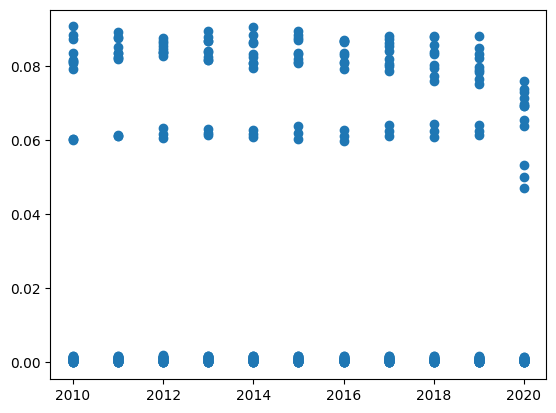

In [75]:
plt.scatter(ihme_gbd_2015_2020_df['year'], ihme_gbd_2015_2020_df['val'], label='Texas')

<BarContainer object of 396 artists>

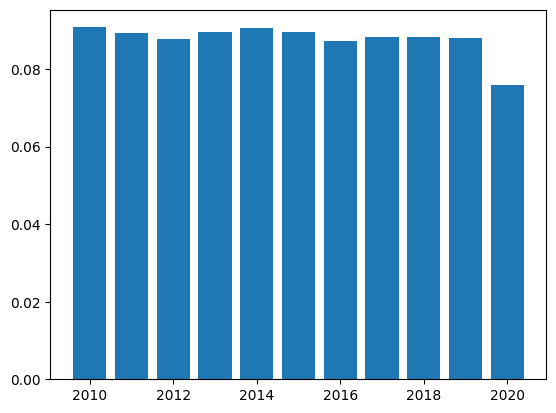

In [76]:
plt.bar(ihme_gbd_2015_2020_df['year'], ihme_gbd_2015_2020_df['val'], label='All')

In [64]:
nm_df = ihme_gbd_2015_2020_df.loc[ihme_gbd_2015_2020_df['location_name'] == 'New Mexico']
tx_df = ihme_gbd_2015_2020_df.loc[ihme_gbd_2015_2020_df['location_name'] == 'Texas']
ny_df = ihme_gbd_2015_2020_df.loc[ihme_gbd_2015_2020_df['location_name'] == 'New York']
wa_df = ihme_gbd_2015_2020_df.loc[ihme_gbd_2015_2020_df['location_name'] == 'Washington']
wa_df

,measure_name,location_name,sex_name,cause_name,year,val
36,Probability of death,Washington,Male,Chronic respiratory diseases,2010,0.079402
37,Probability of death,Washington,Female,Chronic respiratory diseases,2010,0.083626
38,Probability of death,Washington,Both,Chronic respiratory diseases,2010,0.081192
39,Probability of death,Washington,Male,Pneumoconiosis,2010,0.001067
40,Probability of death,Washington,Female,Pneumoconiosis,2010,0.000039
...,...,...,...,...,...,...
310,Probability of death,Washington,Female,Pneumoconiosis,2020,0.000028
311,Probability of death,Washington,Both,Pneumoconiosis,2020,0.000361
312,Probability of death,Washington,Male,Asthma,2020,0.000778
313,Probability of death,Washington,Female,Asthma,2020,0.001485


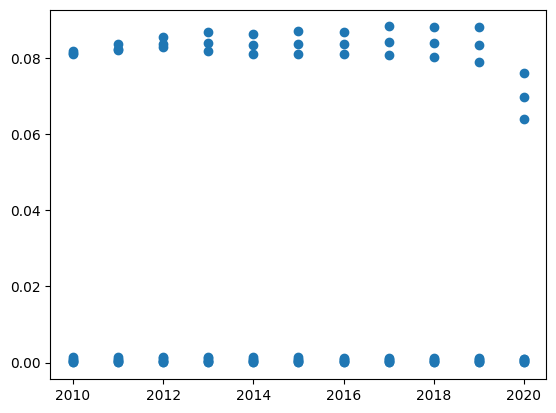

In [65]:
plt.scatter(tx_df['year'], tx_df['val'], label='Texas')

In [10]:
# Display info on the AQI by county DataFrame
display(aqi_county_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                6151 non-null   object
 1   County                               6151 non-null   object
 2   Year                                 6151 non-null   int64 
 3   Days with AQI                        6151 non-null   int64 
 4   Good Days                            6151 non-null   int64 
 5   Moderate Days                        6151 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  6151 non-null   int64 
 7   Unhealthy Days                       6151 non-null   int64 
 8   Very Unhealthy Days                  6151 non-null   int64 
 9   Hazardous Days                       6151 non-null   int64 
 10  Max AQI                              6151 non-null   int64 
 11  90th Percentile AQI                  6151 n

None

In [11]:
# Display info on the AQI by State DataFrame
# display(aqi_WA_NY_NM_2015_2020_df.info())
display(aqi_WA_NY_TX_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_code                   237 non-null    int64  
 1   county_code                  237 non-null    int64  
 2   site_number                  237 non-null    int64  
 3   parameter_code               237 non-null    int64  
 4   poc                          237 non-null    int64  
 5   latitude                     237 non-null    float64
 6   longitude                    237 non-null    float64
 7   datum                        237 non-null    object 
 8   parameter                    237 non-null    object 
 9   sample_duration_code         237 non-null    int64  
 10  sample_duration              237 non-null    object 
 11  pollutant_standard           0 non-null      float64
 12  metric_used                  237 non-null    object 
 13  method              

None

In [12]:
# Display info on the Global Health data concerning respitory illness
display(ihme_gbd_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     396 non-null    int64  
 1   measure_name   396 non-null    object 
 2   location_id    396 non-null    int64  
 3   location_name  396 non-null    object 
 4   sex_id         396 non-null    int64  
 5   sex_name       396 non-null    object 
 6   age_id         396 non-null    int64  
 7   age_name       396 non-null    object 
 8   cause_id       396 non-null    int64  
 9   cause_name     396 non-null    object 
 10  metric_id      396 non-null    int64  
 11  metric_name    396 non-null    object 
 12  year           396 non-null    int64  
 13  val            396 non-null    float64
 14  upper          0 non-null      float64
 15  lower          0 non-null      float64
dtypes: float64(3), int64(7), object(6)
memory usage: 49.6+ KB


None

In [13]:
# Narrow the AQI by county data to Washington, New York, and New Mexico
aqi_county_WA_NY_NM_df = aqi_county_2015_2020_df.loc[(aqi_county_2015_2020_df['State'] == 'New York') | (aqi_county_2015_2020_df['State'] == 'Washington') | (aqi_county_2015_2020_df['State'] == 'New Mexico')]
aqi_county_WA_NY_NM_df.reset_index(drop=True, inplace=True)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,0,0,236,95,34
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0,0,0,112,0
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0,0,0,114,0
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,0,1,156,168,40
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0,3,353,0,0


In [14]:
# Narrow the AQI by county data to Washington, New York, and Texas
aqi_county_WA_NY_TX_df = aqi_county_2015_2020_df.loc[(aqi_county_2015_2020_df['State'] == 'New York') | (aqi_county_2015_2020_df['State'] == 'Washington') | (aqi_county_2015_2020_df['State'] == 'Texas')]
aqi_county_WA_NY_TX_df.reset_index(drop=True, inplace=True)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1,0,182,182,0
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,0,49,125,191,0
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,0,0,317,45,0
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,0,0,358,0,0
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,0,9,88,268,0


In [15]:
# (aqi_county_wa_ny_nm_df['Max AQI'] >= 500).value_counts()
# (aqi_county_wa_ny_tx_df['Max AQI'] >= 500).value_counts()

In [16]:
# Remove unwanted columns
aqi_county_WA_NY_NM_df = aqi_county_WA_NY_NM_df.drop(columns=['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'], axis=1)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 13)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43


In [17]:
# Remove unwanted columns
aqi_county_WA_NY_TX_df = aqi_county_WA_NY_TX_df.drop(columns=['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'], axis=1)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 13)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52


In [18]:
aqi_county_WA_NY_NM_df['combined unhealthy days'] = aqi_county_WA_NY_NM_df[['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days']].sum(axis=1)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 14)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,4
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,12
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0


In [19]:
aqi_county_WA_NY_TX_df['combined unhealthy days'] = aqi_county_WA_NY_TX_df[['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days']].sum(axis=1)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 14)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,6
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,5
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,2
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,4


In [21]:
max_AQI_df = aqi_county_WA_NY_NM_df[['State', 'Year', 'Max AQI']]
max_AQI_by_year_df = max_AQI_df.groupby(['State', 'Year']).max()
max_AQI_by_year_df

Max AQI
State      Year         
New Mexico 2015      159
           2016      594
           2017      630
           2018      187
           2019      645
           2020      389
New York   2015      150
           2016      156
           2017      159
           2018      210
           2019      150
           2020      157
Washington 2015      820
           2016      199
           2017      317
           2018      627
           2019      146
           2020     1358

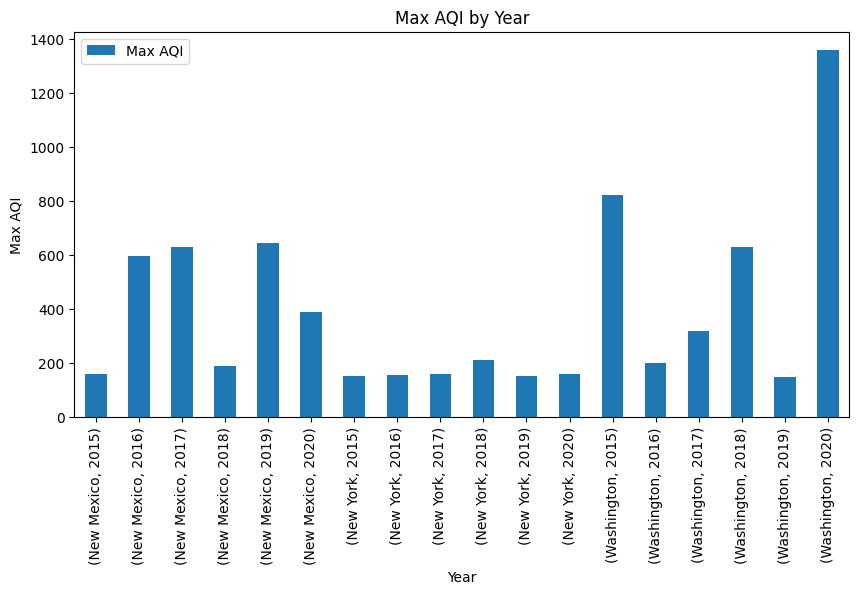

In [41]:
max_AQI_by_year_df.plot(kind="bar", figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Max AQI")
plt.title("Max AQI by Year")
plt.show()

In [25]:
aqi_2015_3states_df = aqi_county_WA_NY_NM_df.loc[(aqi_county_WA_NY_NM_df['Year'] == 2015)]
aqi_2015_3states_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,4
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,12
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Washington,Thurston,2015,357,295,62,0,0,0,0,99,58,34,0
70,Washington,Walla Walla,2015,362,289,69,3,1,0,0,153,56,26,4
71,Washington,Whatcom,2015,331,279,52,0,0,0,0,91,53,34,0
72,Washington,Whitman,2015,362,297,57,7,1,0,0,185,56,26,8


In [26]:
aq_ny_df = aqi_county_WA_NY_NM_df.loc[aqi_county_WA_NY_NM_df['State'] == 'New York']
aq_ny_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
16,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1
17,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,6
18,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,5
19,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,2
20,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,New York,Steuben,2020,365,330,35,0,0,0,0,81,49,36,0
412,New York,Suffolk,2020,366,282,78,6,0,0,0,133,63,40,6
413,New York,Tompkins,2020,364,359,5,0,0,0,0,64,44,34,0
414,New York,Wayne,2020,327,305,22,0,0,0,0,80,46,34,0


In [28]:
# Create an interactive map of the Air Quality data for each counties in New York
aq_ny_2015_df = aq_ny_df[aq_ny_df["Year"] == 2015]
aq_ny_2015_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
16,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1
17,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,6
18,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,5
19,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,2
20,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,4


In [30]:
max_good_days = aq_ny_2015_df[aq_ny_2015_df['Good Days'] == aq_ny_2015_df['Good Days'].max()]
max_moderate_days = aq_ny_2015_df[aq_ny_2015_df['Moderate Days'] == aq_ny_2015_df['Moderate Days'].max()]
max_unhealthy_sensitive_days = aq_ny_2015_df[aq_ny_2015_df['Unhealthy for Sensitive Groups Days'] == aq_ny_2015_df['Unhealthy for Sensitive Groups Days'].max()]

In [31]:
def print_colored(text, color):
    print(termcolor.colored(text, color))

In [32]:
print_colored("The county with the most good AQI days in 2015 is: ", "green")
print_colored(max_good_days, "green")
print_colored("The county with the most moderate AQI days in 2015 is: ", "yellow")
print_colored(max_moderate_days, "yellow")
print_colored("The county with the most unhealthy AQO for sensitive groups days in 2015 is: ", "red")
print_colored(max_unhealthy_sensitive_days, "red")


The county with the most good AQI days in 2015 is: 
       State    County  Year  Days with AQI  Good Days  Moderate Days  \
24  New York  Herkimer  2015            360        351              9   

    Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
24                                    0               0                    0   

    Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  \
24               0       84                   44          33   

    combined unhealthy days  
24                        0  
The county with the most moderate AQI days in 2015 is: 
       State    County  Year  Days with AQI  Good Days  Moderate Days  \
20  New York      Erie  2015            365        156            205   
29  New York  New York  2015            365        156            205   

    Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
20                                    4               0                    0   
29             

In [33]:
def classify_county(row):
    max_category = max(row['Good Days'], row['Moderate Days'], row['Unhealthy for Sensitive Groups Days'], row['Unhealthy Days'], row['Very Unhealthy Days'], row['Hazardous Days'])
    if max_category == row['Good Days']:
        return 'Good'
    elif max_category == row['Moderate Days']:
        return 'Moderate'
    elif max_category == row['Unhealthy for Sensitive Groups Days']:
        return 'Unhealthy for Sensitive Groups'
    elif max_category == row['Unhealthy Days']:
        return 'Unhealthy'
    elif max_category == row['Very Unhealthy Days']:
        return 'Very Unhealthy'
    elif max_category == row['Hazardous Days']:
        return 'Hazardous'
    else:
        return 'Unknown'

In [34]:
# Set color mpa for the categories
color_map = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for Sensitive Groups': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple', 'Hazardous': 'black'}

In [42]:
# Create a new interactive map of the Air Quality data for each counties in New York with the categories of AQI
aq_ny_2015_df['Category'] = aq_ny_2015_df.apply(classify_county, axis=1)
aq_ny_2015_df['Color'] = aq_ny_2015_df['Category'].map(color_map)
aq_ny_2015_df.head()
ny_map = folium.Map(location=[42.651167, -74.217696], zoom_start=7)
# for index, row in aq_ny_2015_df.iterrows():
#     folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=row['Color'], fill=True, fill_color=row['Color']).add_to(ny_map)
# ny_map.save('ny_aqi_2015.html')
ny_map

<ipython-input-42-cb70bbbce6d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_ny_2015_df['Category'] = aq_ny_2015_df.apply(classify_county, axis=1)
<ipython-input-42-cb70bbbce6d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_ny_2015_df['Color'] = aq_ny_2015_df['Category'].map(color_map)


<ipython-input-40-41e04add9d97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Good Days', y='County', data=aq_ny_2015_df, palette='Greens')


<Axes: xlabel='Good Days', ylabel='County'>

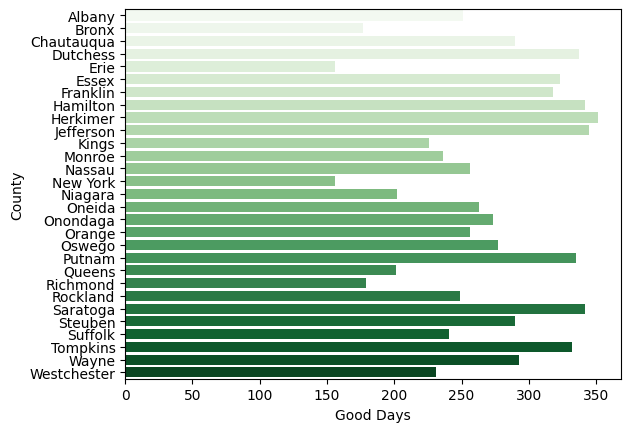

In [40]:
sns.barplot(x='Good Days', y='County', data=aq_ny_2015_df, palette='Greens')

In [46]:
aqi_df = pd.read_csv('/content/county_annual_aqi.csv')
aqi_df['Very Unhealthy Days'] = aqi_df['Very Unhealthy Days'] + aqi_df['Hazardous Days']
aqi_columns_to_drop = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10', 'Unhealthy for Sensitive Groups Days', 'County', 'Hazardous Days']
aqi_df = aqi_df.drop(columns=aqi_columns_to_drop)
aqi_df = aqi_df[(aqi_df['Year'] >= 2015) & (aqi_df['Year'] <= 2020)]
aqi_df = aqi_df[(aqi_df['State'] == 'New York') |
                (aqi_df['State'] == 'New Mexico') |
                (aqi_df['State'] == 'Texas') |
                (aqi_df['State'] == 'Washington')]
aqi_df = aqi_df.groupby(['State', 'Year']).mean().reset_index()
aqi_df = aqi_df.set_index(['State', 'Year'])
aqi_df


Days with AQI   Good Days  Moderate Days  Unhealthy Days  \
State      Year                                                             
New Mexico 2015     283.125000  220.437500      61.500000        0.125000   
           2016     284.750000  222.500000      60.812500        0.250000   
           2017     285.250000  201.937500      78.875000        0.250000   
           2018     285.625000  192.375000      85.812500        0.500000   
           2019     283.062500  203.562500      76.125000        0.312500   
           2020     285.250000  213.562500      68.250000        0.250000   
New York   2015     352.241379  266.482759      83.068966        0.000000   
           2016     351.758621  283.620690      65.000000        0.068966   
           2017     350.965517  289.551724      59.827586        0.103448   
           2018     349.964286  280.357143      66.250000        0.178571   
           2019     334.827586  283.379310      50.689655        0.000000   
           2020     357.111111  306.296296      50.111111        0.074074   
Texas      2015     349.756098  238.219512     105.634146        0.731707   
           2016     343.428571  256.428571      85.000000        0.095238   
           2017     343.690476  244.738095      95.619048        0.142857   
           2018     346.214286  240.023810     100.357143        0.571429   
           2019     352.195122  243.804878     105.000000        0.219512   
           2020     352.266667  253.644444      95.444444        0.511111   
Washington 2015     345.931034  258.758621      82.241379        1.034483   
           2016     348.758621  291.000000      56.793103        0.172414   
           2017     346.000000  254.166667      81.600000        3.566667   
           2018     355.600000  269.466667      76.266667        4.066667   
           2019     353.483871  278.354839      74.548387        0.000000   
           2020     345.322581  280.258065      56.483871        2.709677   

                 Very Unhealthy Days     Max AQI  90th Percentile AQI  \
State      Year                                                         
New Mexico 2015             0.000000   90.500000            50.312500   
           2016             0.062500  121.750000            49.937500   
           2017             0.187500  136.187500            56.812500   
           2018             0.000000  110.187500            64.062500   
           2019             0.312500  154.562500            55.437500   
           2020             0.312500  129.500000            55.000000   
New York   2015             0.000000  111.965517            57.103448   
           2016             0.000000  119.413793            54.724138   
           2017             0.000000  102.034483            52.793103   
           2018             0.035714  122.928571            55.607143   
           2019             0.000000   85.793103            51.758621   
           2020             0.000000   91.925926            51.925926   
Texas      2015             0.024390  122.731707            64.804878   
           2016             0.000000  106.023810            57.357143   
           2017             0.023810  114.619048            60.000000   
           2018             0.047619  130.428571            62.714286   
           2019             0.024390  115.951220            60.390244   
           2020             0.000000  123.066667            58.866667   
Washington 2015             0.275862  166.068966            60.137931   
           2016             0.000000   91.068966            51.724138   
           2017             0.900000  195.333333            64.866667   
           2018             0.766667  216.266667            62.066667   
           2019             0.000000   87.838710            55.967742   
           2020             4.451613  453.354839            55.322581   

                 Median AQI  
State      Year              
New Mexico 2015   32.125000  
           2016   32.2500

In [47]:
ihme_df = pd.read_csv('/content/IHME-GBD_2021_DATA-a408dab9-1.csv')
ihme_columns_to_drop = ['measure_id', 'location_id', 'sex_id', 'age_id', 'cause_id', 'metric_id', 'metric_name', 'upper', 'lower', 'age_name']
ihme_df = ihme_df.drop(columns=ihme_columns_to_drop)
ihme_df = ihme_df.rename(columns={
    'location_name': 'State',
    'measure_name': 'Measure',
    'sex_name': 'Sex',
    'cause_name': 'Cause',
    'val': 'Chronic Respiratory  Related POD (%)',
    'year': 'Year'})
ihme_df['Chronic Respiratory  Related POD (%)'] = ihme_df['Chronic Respiratory  Related POD (%)'] * 100
ihme_df = ihme_df[(ihme_df['Year'] >= 2015) & (ihme_df['Year'] <= 2020)]
ihme_df = ihme_df.groupby(['State', 'Year'])['Chronic Respiratory  Related POD (%)'].mean().reset_index()
ihme_df = ihme_df.set_index(['State', 'Year'])
ihme_df

Chronic Respiratory  Related POD (%)
State      Year                                      
New Mexico 2015                              3.019015
           2016                              2.959865
           2017                              2.942241
           2018                              2.920732
           2019                              2.805925
           2020                              2.363932
New York   2015                              2.123556
           2016                              2.093678
           2017                              2.134590
           2018                              2.136783
           2019                              2.139871
           2020                              1.715983
Texas      2015                              2.838292
           2016                              2.834182
           2017                              2.853857
           2018                              2.842561
           2019                              2.821173
           2020                              2.362647
Washington 2015                              2.798921
           2016                              2.758949
           2017                              2.734191
           2018                              2.645154
           2019                              2.612461
           2020                              2.433072

In [49]:
bea_df = pd.read_csv('/content/BEA_annual.csv', index_col=['State', 'Year'])
bea_df

personal_income  GDP (in $)  people_employed
State      Year                                              
New Mexico 2015          79130.8     90779.4          1092272
           2016          80782.3     90476.0          1092375
           2017          82354.1     93210.1          1095489
           2018          86179.5     98838.2          1110587
           2019          91208.9    103821.0          1116429
           2020          98480.2    100656.4          1068784
New York   2015        1137082.3   1498474.7         12099197
           2016        1176654.7   1556830.0         12259166
           2017        1255776.7   1624800.7         12391361
           2018        1298669.0   1710665.6         12655123
           2019        1343851.2   1787470.9         12745397
           2020        1415297.4   1773369.8         11871078
Washington 2015         376360.8    467590.6          4199164
           2016         397270.6    489790.2          4313722
           2017         423017.2    527169.4          4432271
           2018         451609.2    570337.8          4537842
           2019         484540.9    608643.4          4591912
           2020         522509.2    620132.9          4434976

In [56]:
master_df = bea_df.merge(aqi_df, left_index=True, right_index=True)
master_df = master_df.merge(ihme_df, left_index=True, right_index=True)
# Creating Master Data Set
master_df.to_csv('/content/master.csv')
# Load the master dataset
master_df = pd.read_csv('/content/master.csv', index_col=['State', 'Year'])
master_df

personal_income  GDP (in $)  people_employed  Days with AQI  \
State      Year                                                                
New Mexico 2015          79130.8     90779.4          1092272     283.125000   
           2016          80782.3     90476.0          1092375     284.750000   
           2017          82354.1     93210.1          1095489     285.250000   
           2018          86179.5     98838.2          1110587     285.625000   
           2019          91208.9    103821.0          1116429     283.062500   
           2020          98480.2    100656.4          1068784     285.250000   
New York   2015        1137082.3   1498474.7         12099197     352.241379   
           2016        1176654.7   1556830.0         12259166     351.758621   
           2017        1255776.7   1624800.7         12391361     350.965517   
           2018        1298669.0   1710665.6         12655123     349.964286   
           2019        1343851.2   1787470.9         12745397     334.827586   
           2020        1415297.4   1773369.8         11871078     357.111111   
Washington 2015         376360.8    467590.6          4199164     345.931034   
           2016         397270.6    489790.2          4313722     348.758621   
           2017         423017.2    527169.4          4432271     346.000000   
           2018         451609.2    570337.8          4537842     355.600000   
           2019         484540.9    608643.4          4591912     353.483871   
           2020         522509.2    620132.9          4434976     345.322581   

                  Good Days  Moderate Days  Unhealthy Days  \
State      Year                                              
New Mexico 2015  220.437500      61.500000        0.125000   
           2016  222.500000      60.812500        0.250000   
           2017  201.937500      78.875000        0.250000   
           2018  192.375000      85.812500        0.500000   
           2019  203.562500      76.125000        0.312500   
           2020  213.562500      68.250000        0.250000   
New York   2015  266.482759      83.068966        0.000000   
           2016  283.620690      65.000000        0.068966   
           2017  289.551724      59.827586        0.103448   
           2018  280.357143      66.250000        0.178571   
           2019  283.379310      50.689655        0.000000   
           2020  306.296296      50.111111        0.074074   
Washington 2015  258.758621      82.241379        1.034483   
           2016  291.000000      56.793103        0.172414   
           2017  254.166667      81.600000        3.566667   
           2018  269.466667      76.266667        4.066667   
           2019  278.354839      74.548387        0.000000   
           2020  280.258065      56.483871        2.709677   

                 Very Unhealthy Days     Max AQI  90th Percentile AQI  \
State      Year                                                         
New Mexico 2015             0.000000   90.500000            50.312500   
           2016             0.062500  121.750000            49.937500   
           2017             0.187500  136.187500            56.812500   
           2018             0.000000  110.187500            64.062500   
           2019             0.312500  154.562500            55.437500   
           2020             0.312500  129.500000            55.000000   
New York   2015             0.000000  111.965517            57.103448   
           2016             0.000000  119.413793            54.724138   
           2017             0.000000  102.034483            52.793103   
           2018             0.035714  122.928571            55.607143   
           2019             0.000000   85.793103            51.758621   
           2020             0.000000   91.925926            51.925926   
Washington 2015             0.275862  166.068966            60.137931   
           2016             0.000000   91.068966            51.724138   
       

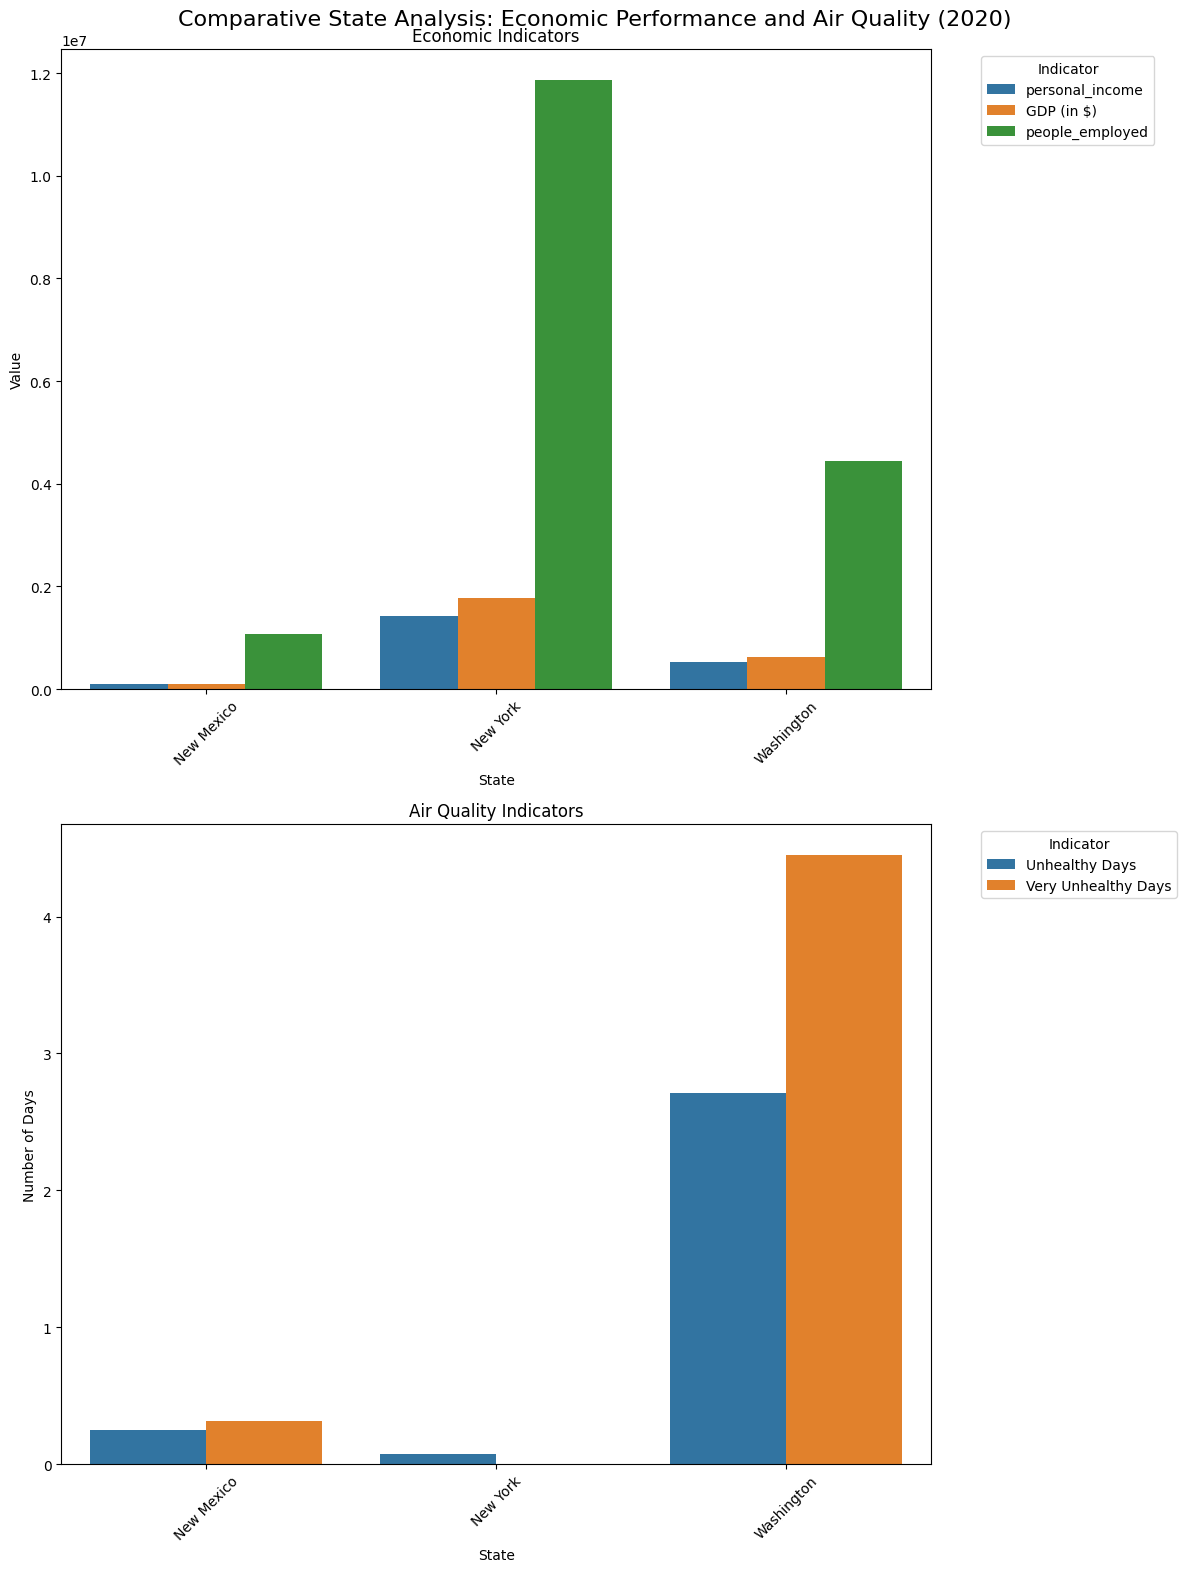

In [57]:
# Filter the data for 2020
df_2020 = master_df.loc[pd.IndexSlice[:, 2020], :].copy()
# Reset index to make State a column
df_2020 = df_2020.reset_index()
# Prepare economic indicators
economic_data = df_2020[['State', 'personal_income', 'GDP (in $)', 'people_employed']]
economic_data_melted = economic_data.melt(id_vars=['State'], var_name='Indicator', value_name='Value')
# Prepare air quality indicators
# air_quality_data = df_2020[['State', 'Good Days', 'Moderate Days', 'Unhealthy Days', 'Very Unhealthy Days']]
air_quality_data = df_2020[['State', 'Unhealthy Days', 'Very Unhealthy Days']]
air_quality_data_melted = air_quality_data.melt(id_vars=['State'], var_name='Indicator', value_name='Value')
# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
fig.suptitle('Comparative State Analysis: Economic Performance and Air Quality (2020)', fontsize=16)
# Plot economic indicators
sns.barplot(x='State', y='Value', hue='Indicator', data=economic_data_melted, ax=ax1)
ax1.set_title('Economic Indicators')
ax1.set_ylabel('Value')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
# Plot air quality indicators
sns.barplot(x='State', y='Value', hue='Indicator', data=air_quality_data_melted, ax=ax2)
ax2.set_title('Air Quality Indicators')
ax2.set_ylabel('Number of Days')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


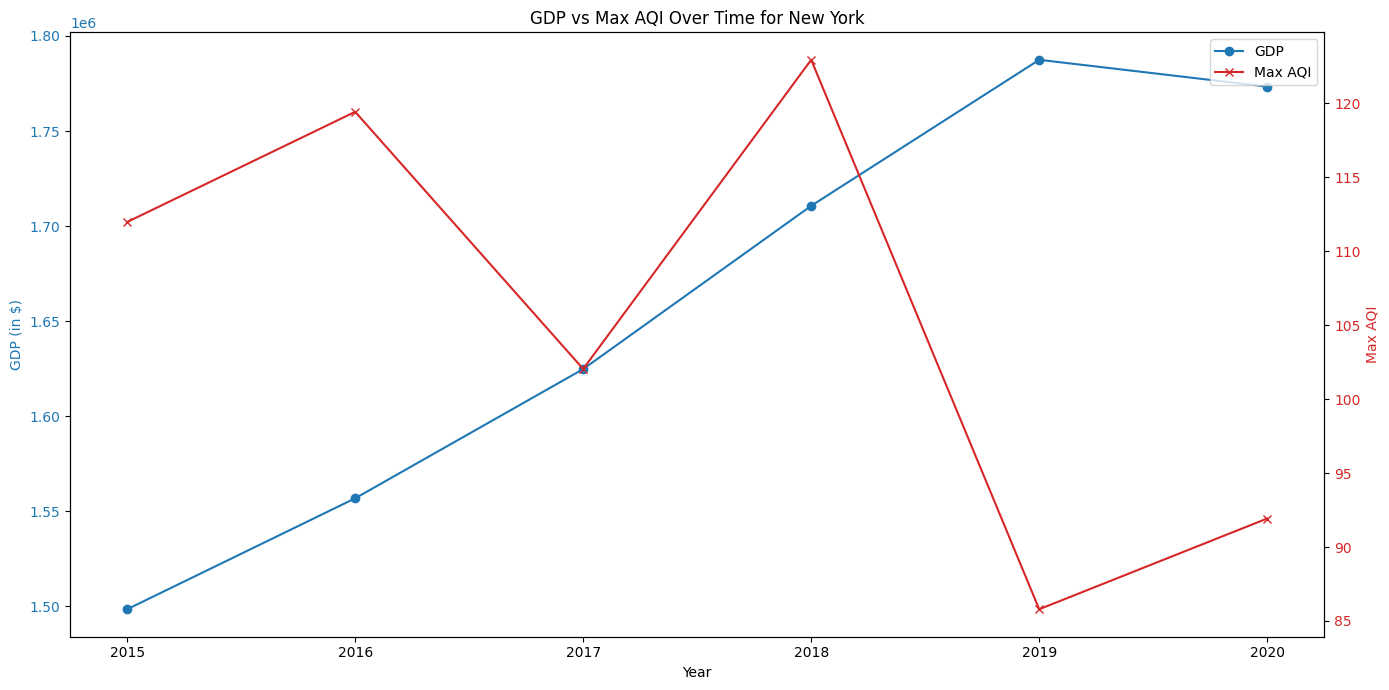

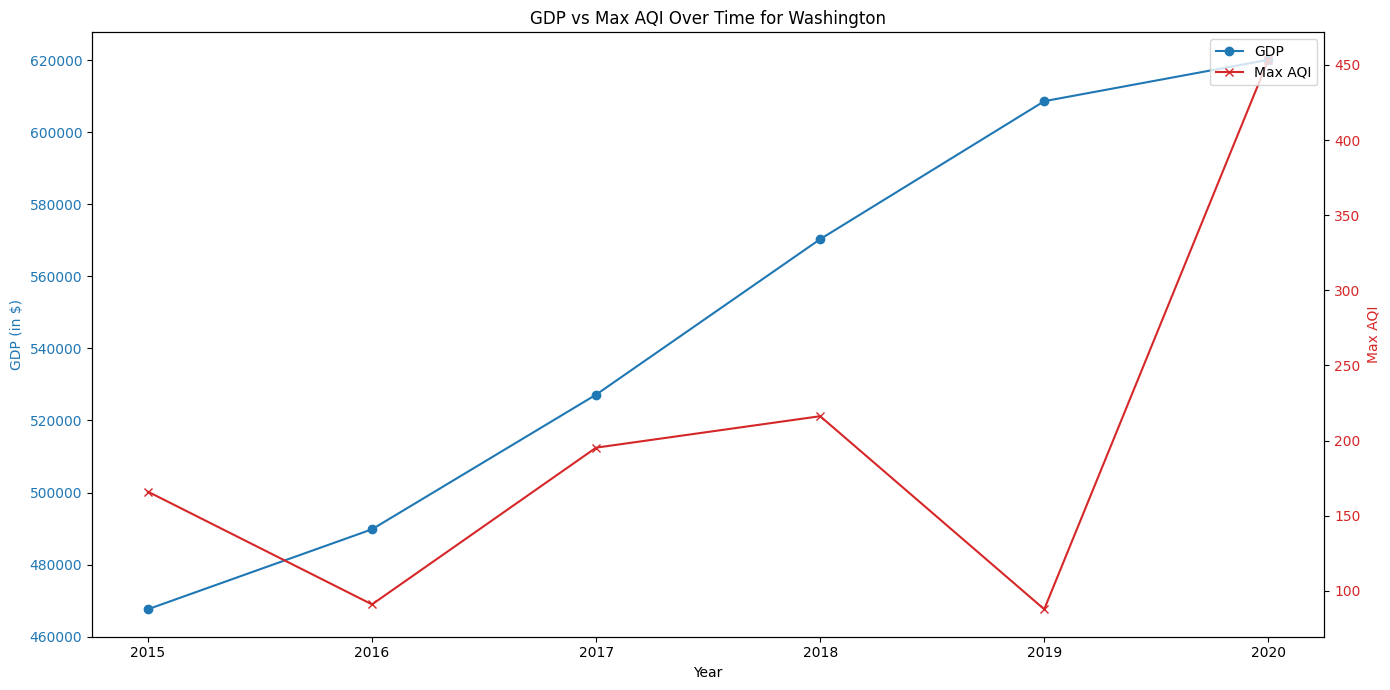

In [52]:
# Function to create plot for a given state
master_df = master_df.reset_index()
def create_gdp_aqi_plot(state_data, state_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Plot GDP on the first y-axis
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP (in $)', color='tab:blue')
    ax1.plot(state_data['Year'], state_data['GDP (in $)'], color='tab:blue', marker='o', label='GDP')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    # Create a second y-axis for Max AQI
    ax2 = ax1.twinx()
    ax2.set_ylabel('Max AQI', color='tab:red')
    ax2.plot(state_data['Year'], state_data['Max AQI'], color='tab:red', marker='x', label='Max AQI')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title(f'GDP vs Max AQI Over Time for {state_name}')
    fig.tight_layout()
    plt.show()
# Create plot for New York
ny_data = master_df[master_df['State'] == 'New York']
create_gdp_aqi_plot(ny_data, 'New York')
# Create plot for Washington
wa_data = master_df[master_df['State'] == 'Washington']
create_gdp_aqi_plot(wa_data, 'Washington')